<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [0]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remember, if you scrape Indeed, you're helping yourself find a job. ;)

In [0]:
df = pd.read_csv('job_listings.csv', encoding='utf-8')

In [3]:
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [0]:
# Remove html tags.
df['description'] = df['description'].str.replace(r'<.*?>', ' ')

In [0]:
# Remove annoying unicode characters.
df['description'] = df['description'].str.replace(r'\\x..', ' ')

In [0]:
# Reduce any excess whitespace to a single space per instance.
df['description'] = df['description'].str.replace(r'\s+', ' ').str.strip()

In [7]:
df.head()

,Unnamed: 0,description,title
0,0,"b"" Job Requirements: \nConceptual understandin...",Data scientist
1,1,b' Job Description \n \n As a Data Scientist 1...,Data Scientist I
2,2,b' As a Data Scientist you will be working on ...,Data Scientist - Entry Level
3,3,"b' $4,969 - $6,756 a month Contract Under the ...",Data Scientist
4,4,b' Location: USA multiple locations \n 2+ year...,Data Scientist


## 2) Use Spacy to tokenize / clean the listings 

In [0]:
nlp = spacy.load('en_core_web_sm')

In [0]:
docs = df['description'].apply(nlp)

In [0]:
data = []
for doc in docs:
  data.append(' '.join([token.lemma_ for token in doc if (token.is_stop != True) \
               and (token.is_punct != True)]))

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [0]:
vect = CountVectorizer(stop_words='english')
vect.fit(data)
dtm = vect.transform(data)
df2 = pd.DataFrame(data=dtm.todense(), columns=vect.get_feature_names())

## 4) Visualize the most common word counts

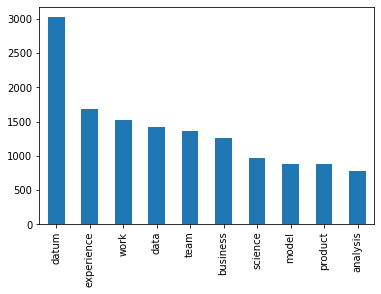

In [12]:
df2.sum().sort_values(ascending=False).head(10).plot.bar();

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [16]:
# Instantiate vectorizer object
tfidf = TfidfVectorizer(min_df=0.025, 
                        max_df=0.98,
                        ngram_range=(1,2))

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(data)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,000,000 year,10,100,12,15,20,2019,25,3rd,3rd party,40,401,500,600,600 city,ability,ability build,ability communicate,ability translate,ability work,ability write,able,able work,about,academic,accelerate,accept,accept unsolicited,access,accessible,accommodation,accomplish,accord,accordance,account,accountability,accredited,accuracy,accurate,...,work fast,work independently,work large,work let,work life,work multiple,work product,work stakeholder,work team,worker,workflow,workforce,working,workplace,world,world class,world forward,world large,world lead,world motion,world nwe,world problem,worldwide,write,write code,write communication,write verbal,writing,www,year,year experience,year hand,year industry,year professional,year relevant,year work,york,york city,you,you ll
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114126,0.0,0.137492,0.0,0.0,0.160304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068402,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025156,0.0,0.060613,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07067,0.0,0.0,0.0,0.0,0.050941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.06722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060310,0.0,0.0,0.0,0.064402,0.0,0.020209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.031217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.099143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [18]:
from sklearn.neighbors import NearestNeighbors
# Instantiate
nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')

# Fit on TF-IDF Vectors
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [0]:
desc = """About Swing:
On average, U.S. students are with substitute teachers for 5% of the typical school year. That means our students have substitute teachers for more than six months of their K-12 school career. The problem? We're suffering from a national shortage of substitute teachers.

Swing Education is focused on tackling the substitute teacher shortage. We make it easy for great schools and quality subs to find each other. We help schools access more subs and offload tedious work (recruiting, screening, payroll, etc.) and we help subs find jobs, gain experience and build their professional network.

Swing is a revenue generating, Series B, YC company (through ImagineK12).

The Position:
Swing’s product, data, design and engineering team (referred to as “PNE”) is a tight-knit group charged with solving big, challenging problems using a collaborative, multidisciplinary approach. We pursue a variety of problems ranging from how best to optimize substitute teacher and school matching, to designing and analyzing the impact of growth incentives. The Jr. Data Scientist will dig into data to uncover insights, design experiments, measure impact and contribute to longer-term product strategy.

You’ll be expected to:

    Work closely with PNE to conduct in-depth quantitative analyses to guide strategic product and business decisions
    Design, analyze and communicate the results of product experiments
    Make recommendations based on detailed analysis and a deep understanding of our product
    Build and maintain reports, models, and visualizations which provide insight into product performance, user experiences and business performance

The ideal candidate enjoys working cross-collaboratively in a fast-paced, growing team to better serve our substitute teachers and schools. This person is excited about Swing’s mission and is looking to make an impact with their work.

Requirements:
If you don't think you meet all of the requirements below but are still interested in the job, please apply. We’re looking for someone excited about our mission and team.

    BA/BS in a quantitative field such as statistics, mathematics, economics, engineering or natural sciences (or equivalent experience).
    Experience working in quantitative or analytical role, preferably in technology, finance or consulting
    Expert level SQL skills, and experience with Python / R a plus
    Experience or ability to translate data into decision-ready insights
    Good communicator, someone who can explain complex concepts in simple terms
    Scrappy and resourceful, knows how to execute pragmatically

Perks:

    Great medical, dental and vision benefits
    Generous PTO, including many school holidays
    Paid Holidays
    Stock options
    401k match
    Generous family leave benefits
    Stipend for professional development
    A stocked kitchen and unlimited coffee and boba runs
    Mission-driven work
    Fun, collaborative, balanced culture"""

In [0]:
vec = tfidf.transform([desc])

In [25]:
nn.kneighbors(vec.todense())

(array([[1.24938367, 1.25322972, 1.25889286, 1.26814769, 1.27876128]]),
 array([[366, 337, 325, 314,  18]]))

In [29]:
df.iloc[366]['description']

"b' Data science encompasses the computational and statistical skills required to use data in support of scientific enquiry and sound business decision-making. We are looking to hire candidates to work on challenging data science problems across our oil &amp; gas businesses, including exploration, production, refining, chemicals, retail and corporate services. \\n Job Role Responsibilities\\n Apply statistical analysis, pattern recognition, and machine learning along with domain knowledge and subject-specific models to solve science, engineering, and commercial problems. \\n Contribute to all stages of data science or decision modeling projects, including problem formulation, solution development, and product deployment:\\n Translate business-relevant scientific, engineering, and commercial problems into questions that may be addressed using data science. \\n Design experiments and/or run simulations to generate new data in support of analytic studies. \\n Retrieve and combine data fro

In [30]:
df.iloc[337]['description']

'b\'Mode is a company built for analysts and data scientists. In addition to building a product to help them be great at their jobs, Mode aims to be a source of education and inspiration for analysts and data scientists of all experience levels.\\n \\nMode\\\'s own Data Science team is a critical part of this mission. The team has a dual mandate. First, we serve internal customers in all parts of the Mode organization to help guide and empower decision-making. Second, the team works to inspire others to be data-driven by "open-sourcing" the resources and analyses we create internally.\\n \\nWhat you\\\'ll do\\n \\n \\n Work with others across Mode to help them make strategic, data-driven decisions about product development, marketing, and sales. \\n Help teams translate their core objectives into key metrics, and build systems that keep everyone at Mode informed of those metrics. \\n Find opportunities where data could improve our product and company, and create reports, data applicati

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 